# Install dependencies

In [ ]:
# for handLandmarks in results.multi_hand_landmarks:
#             mpDrawing.draw_landmarks(
#                 imgRGB, #image to draw
#                 handLandmarks, # model output
#                 mpHands.HAND_CONNECTIONS,
#                 mpDrawingStyles.get_default_hand_landmarks_style(),
#                 mpDrawingStyles.get_default_hand_connections_style())

In [18]:
#!pip install mediapipe

In [18]:
#!pip install mediapipe

In [19]:
#!pip install opencv-python

In [60]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle


In [62]:
mpHands = mp.solutions.hands
mpDrawing = mp.solutions.drawing_utils
mpDrawingStyles = mp.solutions.drawing_styles

hands = mpHands.Hands(static_image_mode=True, min_detection_confidence=0.3)
hands

A A21_2.jpg
A A23_1.jpg
A A24_3.jpg
A A25_2.jpg
A A5_1.jpg
A A7_2.jpg
A A_10_bg.jpg
A A_11_bg.jpg
A A_12_bg.jpg
A A_2_bg.jpg
A A_4_bg.jpg
A A_6_bg.jpg
A A_8_bg.jpg
A A_9_bg.jpg
B B3_1.jpg
B B3_3.jpg
B B4_1.jpg
B B7_2.jpg
B B_4_bg.jpg
C C11_1.jpg
C C11_2.jpg
C C11_3.jpg
C C13_1.jpg
C C13_2.jpg
C C20_1.jpg
C C20_2.jpg
C C20_3.jpg
C C21_2.jpg
C C21_3.jpg
C C22_1.jpg
C C24_1.jpg
C C2_1.jpg
C C2_2.jpg
C C2_3.jpg
C C3_2.jpg
C C3_3.jpg
C C4_3.jpg
C C5_3.jpg
C C6_2.jpg
C C6_3.jpg
C C9_1.jpg
C C_11_bg.jpg
C C_12_bg.jpg
C C_14_bg.jpg
C C_4_bg.jpg
C C_6_bg.jpg
C C_9_bg.jpg
D D10_2.jpg
D D18_2.jpg
D D18_3.jpg
D D20_1.jpg
D D21_2.jpg
D D21_3.jpg
D D23_1.jpg
D D23_2.jpg
D D23_3.jpg
D D24_2.jpg
D D24_3.jpg
D D25_2.jpg
D D4_2.jpg
D D6_1.jpg
D D9_1.jpg
D D9_2.jpg
D D9_3.jpg
E E10_2.jpg
E E10_3.jpg
E E11_3.jpg
E E12_3.jpg
E E14_2.jpg
E E14_3.jpg
E E20_1.jpg
E E20_3.jpg
E E21_1.jpg
E E21_2.jpg
E E21_3.jpg
E E5_2.jpg
E E8_2.jpg
E E_11_bg.jpg
E E_12_bg.jpg
E E_13_bg.jpg
E E_1_bg.jpg
E E_3_bg.jpg
E E_8_bg.j

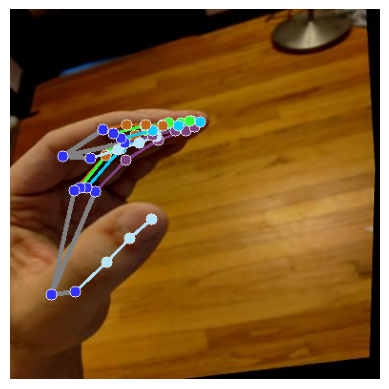

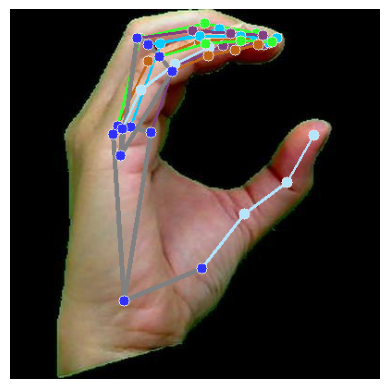

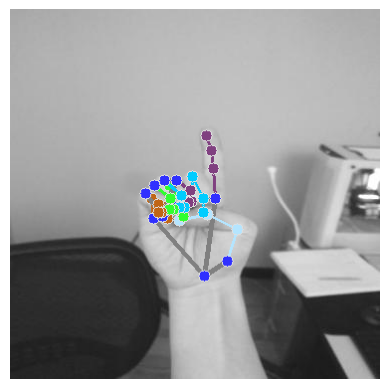

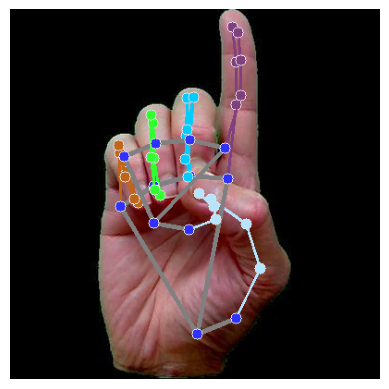

['A A21_2.jpg', 'A A23_1.jpg', 'A A24_3.jpg', 'A A25_2.jpg', 'A A5_1.jpg', 'A A7_2.jpg', 'A A_10_bg.jpg', 'A A_11_bg.jpg', 'A A_12_bg.jpg', 'A A_2_bg.jpg', 'A A_4_bg.jpg', 'A A_6_bg.jpg', 'A A_8_bg.jpg', 'A A_9_bg.jpg', 'B B3_1.jpg', 'B B3_3.jpg', 'B B4_1.jpg', 'B B7_2.jpg', 'B B_4_bg.jpg', 'C C11_1.jpg', 'C C11_2.jpg', 'C C11_3.jpg', 'C C13_1.jpg', 'C C13_2.jpg', 'C C20_1.jpg', 'C C20_2.jpg', 'C C20_3.jpg', 'C C21_2.jpg', 'C C21_3.jpg', 'C C22_1.jpg', 'C C24_1.jpg', 'C C2_1.jpg', 'C C2_2.jpg', 'C C2_3.jpg', 'C C3_2.jpg', 'C C3_3.jpg', 'C C4_3.jpg', 'C C5_3.jpg', 'C C6_2.jpg', 'C C6_3.jpg', 'C C9_1.jpg', 'C C_11_bg.jpg', 'C C_12_bg.jpg', 'C C_14_bg.jpg', 'C C_4_bg.jpg', 'C C_6_bg.jpg', 'C C_9_bg.jpg', 'D D10_2.jpg', 'D D18_2.jpg', 'D D18_3.jpg', 'D D20_1.jpg', 'D D21_2.jpg', 'D D21_3.jpg', 'D D23_1.jpg', 'D D23_2.jpg', 'D D23_3.jpg', 'D D24_2.jpg', 'D D24_3.jpg', 'D D25_2.jpg', 'D D4_2.jpg', 'D D6_1.jpg', 'D D9_1.jpg', 'D D9_2.jpg', 'D D9_3.jpg', 'E E10_2.jpg', 'E E10_3.jpg', 'E E11_3.

In [409]:
dataDirectory = './data'  # Define the path to the data directory

instances = {chr(letter) : 0 for letter in range(ord('A'), ord('Z') + 1)}




showTwoImg = 0  # Initialize a counter to track the number of images displayed
counter = 0
noLandmark = []
doubleLandmark = []

data = []
labels = []
sizes = []

# Iterate through each directory in the specified data directory
flag = 0

for directory in os.listdir(dataDirectory):
    flag += 1

    if flag  > 8:
        break
    # Iterate through each image path in the current directory
    for imgPath in os.listdir(os.path.join(dataDirectory, directory)):     

        dataAUX = []
        
        counter += 1
        instances[imgPath[0]] += 1
        
        img = cv2.imread(os.path.join(dataDirectory, directory, imgPath))  # Read the image from the file
        
        # Check if the image was loaded successfully
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB color space
        
        results = hands.process(imgRGB)
        
        if not results.multi_hand_landmarks:
            print(directory + " " + imgPath)
            noLandmark.append(directory + " " + imgPath)
            continue
            
        for handLandmarks in results.multi_hand_landmarks:
            for i in range(len(handLandmarks.landmark)):
                x = handLandmarks.landmark[i].x
                y = handLandmarks.landmark[i].y
                dataAUX.append(x)
                dataAUX.append(y)
                
        if(len(dataAUX)) != 42:
            doubleLandmark.append(imgPath)
            print("Double " + imgPath)
            continue


            
        #     for handLandmarks in results.multi_hand_landmarks:
        #         mpDrawing.draw_landmarks(
        #             imgRGB, #image to draw
        #             handLandmarks, # model output
        #             mpHands.HAND_CONNECTIONS,
        #             mpDrawingStyles.get_default_hand_landmarks_style(),
        #             mpDrawingStyles.get_default_hand_connections_style())
        #     plt.figure()
        #     plt.imshow(imgRGB)
        #     plt.axis('off')
        
        data.append(dataAUX)
        labels.append(directory)
        sizes.append(len(dataAUX))

# plt.show()          
print(noLandmark)
print(len(noLandmark))
print(counter)
print(counter - len(noLandmark))


In [356]:
print(len(data))
print(len(labels))

print(sizes)

182
182
[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 84, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 84, 42, 42, 42, 42, 42, 42, 42]


In [358]:
print(instances)

{'A': 89, 'B': 65, 'C': 75, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}


In [360]:

noLandmarkInstances = {chr(letter) : 0 for letter in range(ord('A'), ord('Z') + 1)}
for s in noLandmark:
    noLandmarkInstances[s[0]] += 1

print("No land mark instances: ", noLandmarkInstances)

No land mark instances:  {'A': 14, 'B': 5, 'C': 28, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}


In [362]:
landmark = {key: instances.get(key, 0) - noLandmarkInstances.get(key, 0) for key in instances.keys()}

print(landmark)

{'A': 75, 'B': 60, 'C': 47, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}


# Trian

In [365]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [367]:



data = np.asarray(data)
labels = np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, stratify=labels, shuffle=True)


C:\Users\super\AppData\Local\Temp\ipykernel_28932\3290493926.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


In [369]:
model = RandomForestClassifier(random_state=314)



model.fit(x_train, y_train)



y_predict = model.predict(x_test)

y_predict

ValueError: setting an array element with a sequence.

In [371]:
print(len(x_train.shape))
print(len(y_train.shape))

1
1


In [381]:
print(data.shape)

print([len(s) for s in x_train])

(182,)
[42, 42, 42, 42, 42, 42, 42, 42, 42, 84, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
